In [1]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
import  Functions
from Functions import *

Populating the interactive namespace from numpy and matplotlib


variance_hm =  16440.15521902485
variance_ht =   173688.84728060683


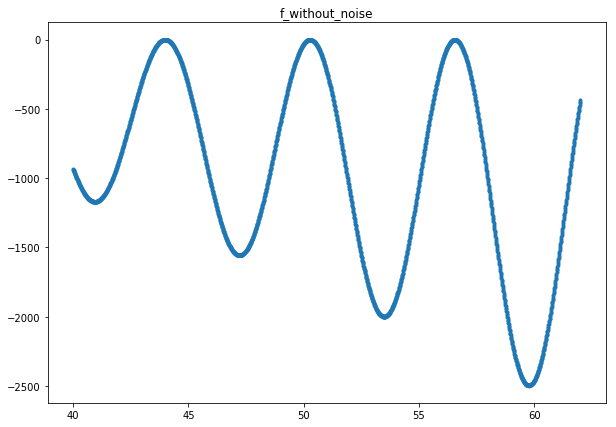

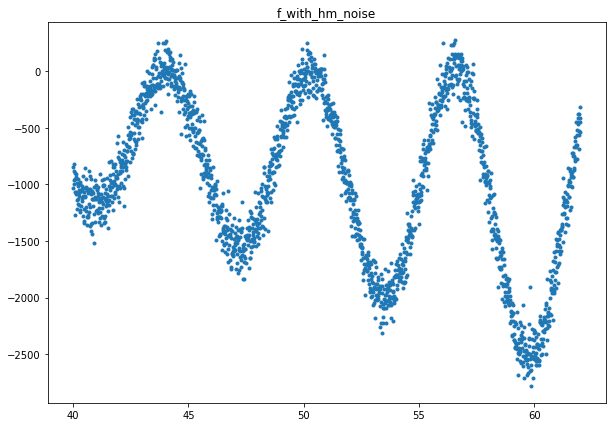

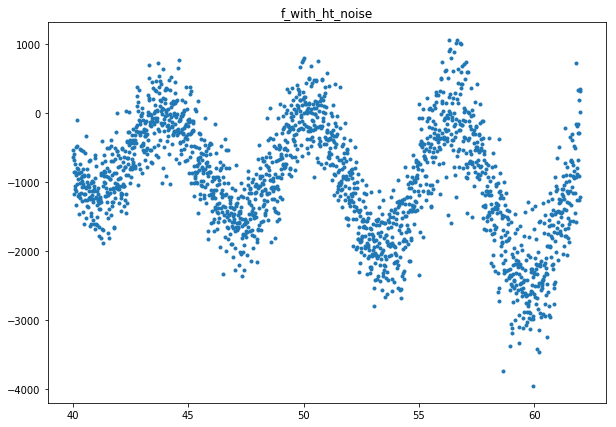

In [41]:
def f (x): 
    return - 0.7 * np.sin(0.5 * x) **2 * x**2

def f_without_noise(X):
    return f (X)
    
    #second function - without homo noise  
def f_with_hm_noise(X):
    return f(X) + np.random.normal(loc=0.0, scale=128, size=(X.shape[0], 1)).reshape(-1, )        

    #third function
def f_with_ht_noise(X):
         #target function  + heteroscadastic noise
    return f (X)  + \
        8 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]        

N = 2000
X = np.linspace(40,  62, N)
V1 = np.array (f_with_hm_noise (X) - f_without_noise (X))
V2 = np.array (f_with_ht_noise (X) - f_without_noise (X))
V1 = V1 **2
V2 = V2 **2

print 'variance_hm = ',  V1.mean()
print 'variance_ht =  ', V2.mean()





y = f_without_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_without_noise")
pyplot.plot(X, y, '.')

y = f_with_hm_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_hm_noise")
pyplot.plot(X, y, '.')
    

y = f_with_ht_noise(X)
pyplot.figure(figsize = (10, 7))
pyplot.title("f_with_ht_noise")
pyplot.plot(X, y, '.')
def f_with_noise(X):
    
    y  = np.array([])
    
    for i in range(X.shape[0]):
        if ( -15. < X[i] < -13.3):#13
            y = np.append(y,   np.sin (X[i]) * (1 + 0.04 * np.abs (X[i]))+ np.random.normal(loc=0.0, scale=1.))
        elif(-21.5 < X[i] < -19.5):
            y = np.append(y,   np.sin (X[i]) * (1 + 0.04 * np.abs (X[i]))+ np.random.normal(loc=0.0, scale=0.2))
            
        else:
            y = np.append(y,   np.sin (X[i]) * (1 + 0.04* np.abs (X[i]))) 
            
    return y 

In [42]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-22, -10)}]  # problem constraints 


#these constants are responsible for the number of iterations of the optimization algorithm
max_iter_for_func = 30
max_iter_for_noise_func = 30


max_time = 200000000000   # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations


iter = 30

# four arrays for storing optimal values
x_opt_without_noise = np.array([])
x_opt_with_noise = np.array([])

y_opt_without_noise = np.array([])
y_opt_with_noise = np.array([])

iter = 100

for i in range(iter):
    print i
    
    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f = f_with_noise,# function to optimize       
                                                domain = bounds, # box-constraints of the problem
                                                acquisition_type = 'EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter_for_func, max_time, eps)     
    
    x_opt_without_noise = np.append (x_opt_without_noise, bayes_opt_without_noise.x_opt)
    y_opt_without_noise = np.append (y_opt_without_noise, bayes_opt_without_noise.fx_opt)
    
    
    
    bayes_opt_with_noise = GPyOpt.methods.BayesianOptimization(f=f_with_noise,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True, model_type = 'GPHet')# Selects the Expected improvement

    bayes_opt_with_noise.run_optimization(max_iter_for_noise_func, max_time, eps) 
    
    x_opt_with_noise = np.append (x_opt_with_noise, bayes_opt_with_noise.x_opt)
    y_opt_with_noise = np.append (y_opt_with_noise, bayes_opt_with_noise.fx_opt)
    
    


    print 'x_opt_without_noise:\n', x_opt_without_noise, '\n'


    print 'x_opt_with_noise:\n', x_opt_with_noise, '\n'



print "average x without noise = ", x_opt_without_noise.mean()
print "average x with noise = ", x_opt_with_noise.mean()
print "diff = ", np.abs (x_opt_without_noise.mean() - x_opt_with_noise.mean()), "\n"


print "average y without noise = ", y_opt_without_noise.mean()
print "average y with noise = ", y_opt_with_noise.mean()
print "diff = ", np.abs (y_opt_without_noise.mean() - y_opt_with_noise.mean()), "\n"
    
print "median x without noise = ", np.median (x_opt_without_noise)
print "median x with noise = ", np.median (x_opt_with_noise)
print "diff = ", np.abs (np.median (x_opt_without_noise) - np.median (x_opt_with_noise)), "\n"


print "median y without noise = ", np.median (y_opt_without_noise)
print "median y with noise = ", np.median (y_opt_with_noise)
print "diff = ", np.abs (np.median (y_opt_without_noise) - np.median (y_opt_with_noise)), "\n"
    

0
max time 200000000000
hmModel (5, 1)
gpreg
hmModel (6, 1)
hmModel (7, 1)
hmModel (8, 1)
hmModel (9, 1)
hmModel (10, 1)
hmModel (11, 1)
hmModel (12, 1)
hmModel (13, 1)
hmModel (14, 1)
hmModel (15, 1)
hmModel (16, 1)
hmModel (17, 1)
hmModel (18, 1)
hmModel (19, 1)
hmModel (20, 1)
hmModel (21, 1)
hmModel (22, 1)
hmModel (23, 1)
hmModel (24, 1)
hmModel (25, 1)
hmModel (26, 1)
hmModel (27, 1)
hmModel (28, 1)
hmModel (29, 1)
hmModel (30, 1)
hmModel (31, 1)
hmModel (32, 1)
hmModel (33, 1)
hmModel (34, 1)
hmModel (35, 1)
break 30 30
GPHetModel+++
Models printout after each iteration is only available for GP and GP_MCMC models
max time 200000000000
hetModel (5, 1)
ee
link hyperparameters
ee++
hetModel (6, 1)
hetModel (7, 1)
hetModel (8, 1)
hetModel (9, 1)
hetModel (10, 1)
hetModel (11, 1)
hetModel (12, 1)
hetModel (13, 1)
hetModel (14, 1)
hetModel (15, 1)
hetModel (16, 1)
hetModel (17, 1)
hetModel (18, 1)
hetModel (19, 1)
hetModel (20, 1)
hetModel (21, 1)
hetModel (22, 1)
hetModel (23, 1)
het

hmModel (9, 1)
hmModel (10, 1)
hmModel (11, 1)
hmModel (12, 1)
hmModel (13, 1)
hmModel (14, 1)
hmModel (15, 1)
hmModel (16, 1)
hmModel (17, 1)
hmModel (18, 1)
hmModel (19, 1)
hmModel (20, 1)
hmModel (21, 1)
hmModel (22, 1)
hmModel (23, 1)
hmModel (24, 1)
hmModel (25, 1)
hmModel (26, 1)
hmModel (27, 1)
hmModel (28, 1)
hmModel (29, 1)
hmModel (30, 1)
hmModel (31, 1)
hmModel (32, 1)
hmModel (33, 1)
hmModel (34, 1)
hmModel (35, 1)
break 30 30
GPHetModel+++
Models printout after each iteration is only available for GP and GP_MCMC models
max time 200000000000
hetModel (5, 1)
ee
link hyperparameters
ee++
hetModel (6, 1)
hetModel (7, 1)
hetModel (8, 1)
hetModel (9, 1)
hetModel (10, 1)
hetModel (11, 1)
hetModel (12, 1)
hetModel (13, 1)
hetModel (14, 1)
hetModel (15, 1)
hetModel (16, 1)
hetModel (17, 1)
hetModel (18, 1)
hetModel (19, 1)
hetModel (20, 1)
hetModel (21, 1)
hetModel (22, 1)
hetModel (23, 1)
hetModel (24, 1)
hetModel (25, 1)
hetModel (26, 1)
hetModel (27, 1)
hetModel (28, 1)
hetModel

hetModel (13, 1)
hetModel (14, 1)
hetModel (15, 1)
hetModel (16, 1)
break 11 30
x_opt_without_noise:
[-14.4742929  -14.19242718 -14.37005354 -14.17754597 -13.8659677
 -13.77079788 -14.19566234 -14.19528604 -13.89630486 -14.28488796
 -14.42784916 -13.54420367] 

x_opt_with_noise:
[-14.09449431 -20.41879393 -20.37543469 -20.44602419 -14.47588329
 -20.3358928  -14.2691193  -20.54074608 -13.8336354  -13.73835222
 -14.61777334 -20.01274975] 

12
max time 200000000000
hmModel (5, 1)
gpreg
hmModel (6, 1)
hmModel (7, 1)
hmModel (8, 1)
hmModel (9, 1)
hmModel (10, 1)
hmModel (11, 1)
hmModel (12, 1)
hmModel (13, 1)
hmModel (14, 1)
hmModel (15, 1)
hmModel (16, 1)
hmModel (17, 1)
hmModel (18, 1)
hmModel (19, 1)
hmModel (20, 1)
hmModel (21, 1)
hmModel (22, 1)
hmModel (23, 1)
hmModel (24, 1)
hmModel (25, 1)
hmModel (26, 1)
hmModel (27, 1)
hmModel (28, 1)
hmModel (29, 1)
hmModel (30, 1)
hmModel (31, 1)
hmModel (32, 1)
hmModel (33, 1)
hmModel (34, 1)
hmModel (35, 1)
break 30 30
GPHetModel+++
Models pri

hetModel (35, 1)
break 30 30
x_opt_without_noise:
[-14.4742929  -14.19242718 -14.37005354 -14.17754597 -13.8659677
 -13.77079788 -14.19566234 -14.19528604 -13.89630486 -14.28488796
 -14.42784916 -13.54420367 -20.26144825 -13.8677326  -14.38813611
 -14.29216372 -13.79743183] 

x_opt_with_noise:
[-14.09449431 -20.41879393 -20.37543469 -20.44602419 -14.47588329
 -20.3358928  -14.2691193  -20.54074608 -13.8336354  -13.73835222
 -14.61777334 -20.01274975 -20.58624042 -14.11653592 -14.12838948
 -20.33873304 -14.25091829] 

17
max time 200000000000
hmModel (5, 1)
gpreg
hmModel (6, 1)
hmModel (7, 1)
hmModel (8, 1)
hmModel (9, 1)
hmModel (10, 1)
hmModel (11, 1)
hmModel (12, 1)
hmModel (13, 1)
hmModel (14, 1)
hmModel (15, 1)
hmModel (16, 1)
hmModel (17, 1)
hmModel (18, 1)
hmModel (19, 1)
hmModel (20, 1)
hmModel (21, 1)
hmModel (22, 1)
hmModel (23, 1)
hmModel (24, 1)
hmModel (25, 1)
hmModel (26, 1)
hmModel (27, 1)
hmModel (28, 1)
hmModel (29, 1)
hmModel (30, 1)
hmModel (31, 1)
hmModel (32, 1)
hmM

hetModel (6, 1)
hetModel (7, 1)
hetModel (8, 1)
hetModel (9, 1)
hetModel (10, 1)
hetModel (11, 1)
hetModel (12, 1)
hetModel (13, 1)
hetModel (14, 1)
hetModel (15, 1)
hetModel (16, 1)
hetModel (17, 1)
hetModel (18, 1)
hetModel (19, 1)
hetModel (20, 1)
hetModel (21, 1)
hetModel (22, 1)
hetModel (23, 1)
hetModel (24, 1)
hetModel (25, 1)
hetModel (26, 1)
hetModel (27, 1)
hetModel (28, 1)
hetModel (29, 1)
hetModel (30, 1)
hetModel (31, 1)
hetModel (32, 1)
hetModel (33, 1)
hetModel (34, 1)
hetModel (35, 1)
break 30 30
x_opt_without_noise:
[-14.4742929  -14.19242718 -14.37005354 -14.17754597 -13.8659677
 -13.77079788 -14.19566234 -14.19528604 -13.89630486 -14.28488796
 -14.42784916 -13.54420367 -20.26144825 -13.8677326  -14.38813611
 -14.29216372 -13.79743183 -20.40458286 -20.41412871 -20.60476021
 -20.3831351  -14.38271488] 

x_opt_with_noise:
[-14.09449431 -20.41879393 -20.37543469 -20.44602419 -14.47588329
 -20.3358928  -14.2691193  -20.54074608 -13.8336354  -13.73835222
 -14.61777334 -20.

hmModel (7, 1)
hmModel (8, 1)
hmModel (9, 1)
hmModel (10, 1)
hmModel (11, 1)
hmModel (12, 1)
hmModel (13, 1)
hmModel (14, 1)
hmModel (15, 1)
hmModel (16, 1)
hmModel (17, 1)
hmModel (18, 1)
hmModel (19, 1)
hmModel (20, 1)
hmModel (21, 1)
hmModel (22, 1)
hmModel (23, 1)
hmModel (24, 1)
hmModel (25, 1)
hmModel (26, 1)
hmModel (27, 1)
hmModel (28, 1)
hmModel (29, 1)
hmModel (30, 1)
hmModel (31, 1)
hmModel (32, 1)
hmModel (33, 1)
hmModel (34, 1)
hmModel (35, 1)
break 30 30
GPHetModel+++
Models printout after each iteration is only available for GP and GP_MCMC models
max time 200000000000
hetModel (5, 1)
ee
link hyperparameters
ee++
hetModel (6, 1)
hetModel (7, 1)
hetModel (8, 1)
hetModel (9, 1)
hetModel (10, 1)
hetModel (11, 1)
hetModel (12, 1)
hetModel (13, 1)
hetModel (14, 1)
hetModel (15, 1)
hetModel (16, 1)
hetModel (17, 1)
hetModel (18, 1)
hetModel (19, 1)
hetModel (20, 1)
hetModel (21, 1)
hetModel (22, 1)
hetModel (23, 1)
hetModel (24, 1)
hetModel (25, 1)
hetModel (26, 1)
hetModel (27

hmModel (17, 1)
hmModel (18, 1)
hmModel (19, 1)
hmModel (20, 1)
hmModel (21, 1)
hmModel (22, 1)
hmModel (23, 1)
hmModel (24, 1)
hmModel (25, 1)
hmModel (26, 1)
hmModel (27, 1)
hmModel (28, 1)
hmModel (29, 1)
hmModel (30, 1)
hmModel (31, 1)
hmModel (32, 1)
hmModel (33, 1)
hmModel (34, 1)
hmModel (35, 1)
break 30 30
GPHetModel+++
Models printout after each iteration is only available for GP and GP_MCMC models
max time 200000000000
hetModel (5, 1)
ee
link hyperparameters
ee++
hetModel (6, 1)
hetModel (7, 1)
hetModel (8, 1)
hetModel (9, 1)
hetModel (10, 1)
hetModel (11, 1)
hetModel (12, 1)
hetModel (13, 1)
hetModel (14, 1)
hetModel (15, 1)
hetModel (16, 1)
hetModel (17, 1)
hetModel (18, 1)
hetModel (19, 1)
hetModel (20, 1)
hetModel (21, 1)
hetModel (22, 1)
hetModel (23, 1)
hetModel (24, 1)
hetModel (25, 1)
hetModel (26, 1)
hetModel (27, 1)
hetModel (28, 1)
hetModel (29, 1)
hetModel (30, 1)
hetModel (31, 1)
hetModel (32, 1)
hetModel (33, 1)
hetModel (34, 1)
hetModel (35, 1)
break 30 30
x_op

hmModel (7, 1)
hmModel (8, 1)
hmModel (9, 1)
hmModel (10, 1)
hmModel (11, 1)
hmModel (12, 1)
hmModel (13, 1)
hmModel (14, 1)
hmModel (15, 1)
hmModel (16, 1)
hmModel (17, 1)
hmModel (18, 1)
hmModel (19, 1)
hmModel (20, 1)
hmModel (21, 1)
hmModel (22, 1)
hmModel (23, 1)
hmModel (24, 1)
hmModel (25, 1)
hmModel (26, 1)
hmModel (27, 1)
hmModel (28, 1)
hmModel (29, 1)
hmModel (30, 1)
hmModel (31, 1)
hmModel (32, 1)
hmModel (33, 1)
hmModel (34, 1)
hmModel (35, 1)
break 30 30
GPHetModel+++
Models printout after each iteration is only available for GP and GP_MCMC models
max time 200000000000
hetModel (5, 1)
ee
link hyperparameters
ee++
hetModel (6, 1)
hetModel (7, 1)
hetModel (8, 1)
hetModel (9, 1)
hetModel (10, 1)
hetModel (11, 1)
hetModel (12, 1)
hetModel (13, 1)
hetModel (14, 1)
hetModel (15, 1)
hetModel (16, 1)
hetModel (17, 1)
hetModel (18, 1)
hetModel (19, 1)
hetModel (20, 1)
hetModel (21, 1)
hetModel (22, 1)
hetModel (23, 1)
hetModel (24, 1)
hetModel (25, 1)
hetModel (26, 1)
hetModel (27

KeyboardInterrupt: 

In [47]:
def f(X):
    
    return np.sin (X) * (1 + 0.04* np.abs (X))

def num_opt_for_two_models (x_opt_with_hm_noise, x_opt_with_ht_noise, optim, eps):
    opt_hm = 0
    opt_ht = 0
    for i in range(35):
        if (optim - eps <= x_opt_with_hm_noise[i] <= optim + eps):
            opt_hm += 1
        if (optim - eps <= x_opt_with_ht_noise[i] <= optim + eps):
            opt_ht += 1
    return opt_hm, opt_ht

num_opt_for_two_models (x_opt_without_noise, x_opt_with_noise, -20.4, 1)


(9, 16)

In [50]:
print f (x_opt_without_noise).mean(), f(x_opt_with_noise).mean()

-1.557491184419733 -1.6133789758759358


def f_with_noise(X):
    
    y  = np.array([])
    
    for i in range(X.shape[0]):
        if (not (-21.5 < X[i] < -19.5 or -14.5 < X[i] < -13)):
            y = np.append(y,   np.sin (X[i]) * (1 + 0.04* np.abs (X[i]))) 
            
        else:
            y = np.append(y,   np.sin (X[i]) * (1 + 0.04 * np.abs (X[i]))+ np.random.normal(loc=0.0, scale=1))
    return y 
    
    
  ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  
  x_opt_without_noise:
[-14.20782203 -13.53231263 -13.77852325 -14.14864296 -20.12082308
 -13.85424665 -19.77556344 -19.80123912 -14.40265801 -20.52581811
 -13.90484977 -19.67820882 -20.63910664 -14.07999922 -19.8831279
 -20.46303018 -13.83110844 -20.23314796 -20.14853012 -20.51168675
 -14.46231412 -14.16230209 -20.45914316 -20.6428875  -21.04707196
 -20.76863389 -14.44810957 -13.4429288  -19.8801835  -19.71949477
 -20.9694819  -13.98515202 -20.57943377 -20.85930611 -13.18394266] 

x_opt_with_noise:
[-19.94827341 -21.08195267 -20.98319144 -14.49113462 -20.21942517
 -20.53437213 -14.15605578 -19.92116277 -20.43052791 -13.89406278
 -20.36535264 -20.377477   -14.38348355 -20.11839888 -19.99592956
 -13.98773806 -13.64872062 -20.30665498 -14.08349782 -19.78578992
 -19.73506742 -20.29670799 -14.16371925 -14.37828742 -20.644786
 -20.1819202  -19.54880264 -20.88854844 -14.35249437 -20.65159699
 -13.13200335 -20.33026369 -20.68996619 -20.06565498 -13.38801885] 